<a href="https://colab.research.google.com/github/mkwak92/AdultIncome/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Adult Income Dataset
- Source of data: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download
- Data Dictionary: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
- Description of Data: This data shows an individual's annual income with the variables of education, age, gender, edication, marital status , etc
- Target: Income (whether it is higher or lower than 50k)
- Is this a classification or regression problem: This is a classification problem as it is between the class over 50k or under 50k for income
- There are 14 features
- There are 48,842 rows


In [218]:
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/Machine Learning: Week 3 Intro to Classification/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Data Cleaning
- deleted unnecessary columns (education and fnlwght removed)

- deleted duplicate rows (removed duplicates)

- identified and addressed missing values (there are no missing values. But there is a category labeled '?' which will be handled as Missing

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats). There are no inconsistencies. Data matches data dictionary

- produced univariate visuals for the target and all features

- identified outliers


In [220]:
ml_df = df.copy()

In [221]:
ml_df.duplicated().sum()

52

In [222]:
ml_df.drop_duplicates(inplace = True)

In [223]:
ml_df.duplicated().sum()

0

In [224]:
ml_df['educational-num'].value_counts()

9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

educational-num corresponds to the education. No need to ordinal encode this and this education can be dropped when doing train/test split


1. Preschool
2. 1st-4th
3. 5th-6th
4. 7th-8th
5. 9th
6. 10th
7. 11th
8. 12th
9. HS-grad
10. Some-college
11. Assoc-voc
12. Assoc-acdm
13. Bachelors
14. Masters
15. Prof-school
16. Doctorate



In [225]:
ml_df[ml_df['educational-num'] ==  17] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [226]:
ml_df['fnlwgt'].value_counts()

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64

- There is no pattern to fnlwght column and the data dictionary does not provide much in here. I will remove this column and OneHotEncode workclass

In [227]:
ml_df[ml_df['fnlwgt'] ==  509350] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17595,32,Private,509350,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,Canada,>50K


In [228]:
ml_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [229]:
data_types = ml_df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [230]:
for col in str_cols:
  print(f'- {col}:')
  print(ml_df[col].value_counts(dropna=False))
  print('\n\n')


- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       6165
Craft-rep

In [231]:
ml_df.describe() #there aren't any outliers. it is feasible someone to be working 99 hours a week. No outliers

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [232]:
ml_df[ml_df['capital-gain'] ==  99999] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [233]:
ml_df[ml_df['hours-per-week'] ==  99] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,378426,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1156,48,?,117054,5th-6th,3,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K
1649,52,Private,254680,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47273,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


# Univariate Visuals of target and all features

In [234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

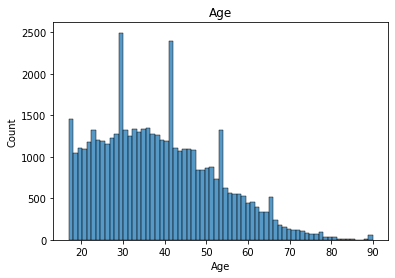

<Figure size 720x720 with 0 Axes>

In [235]:
# There is very wide range of ages 
sns.histplot(data=ml_df, x='age')
plt.title('Age')
#plt.ylabel('Age')
plt.xlabel('Age')
plt.figure(figsize=(10,10))
plt.show();

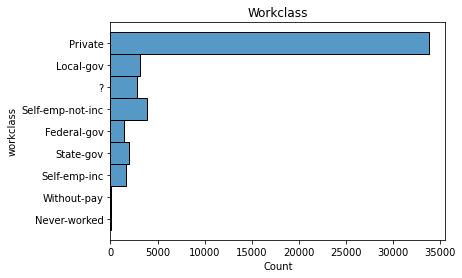

<Figure size 720x720 with 0 Axes>

In [236]:
# Most people work in the private working class
sns.histplot(data=ml_df, y='workclass')
plt.title('Workclass')
plt.ylabel('workclass')
plt.figure(figsize=(10,10))
plt.show();

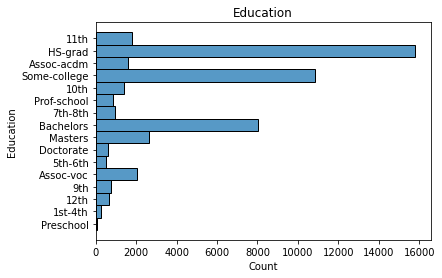

<Figure size 720x720 with 0 Axes>

In [237]:
#Most people have at least a HS Graduate degree
sns.histplot(data=ml_df, y='education')
plt.title('Education')
plt.ylabel('Education')
plt.figure(figsize=(10,10))
plt.show();

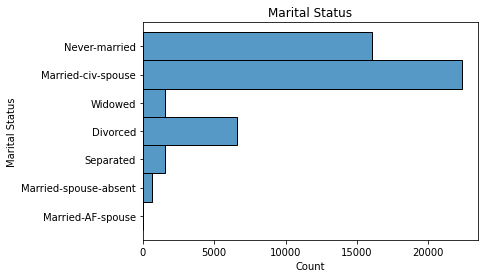

<Figure size 720x720 with 0 Axes>

In [238]:
#most of the people in this data set are never married or married
sns.histplot(data=ml_df, y='marital-status')
plt.title('Marital Status')
plt.ylabel('Marital Status')
plt.figure(figsize=(10,10))
plt.show();

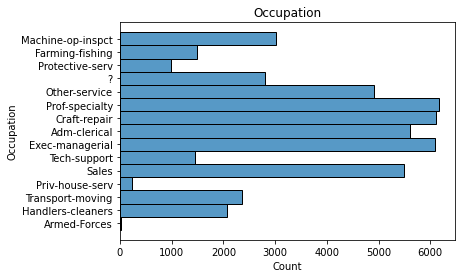

<Figure size 720x720 with 0 Axes>

In [239]:
#occupation is pretty diverse set of people
sns.histplot(data=ml_df, y='occupation')
plt.title('Occupation')
plt.ylabel('Occupation')
plt.figure(figsize=(10,10))
plt.show();

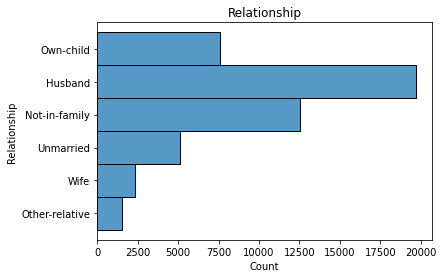

<Figure size 720x720 with 0 Axes>

In [240]:
# Most people in this dataset are Husbands which relates to why there are many males in this dataset
sns.histplot(data=ml_df, y='relationship')
plt.title('Relationship')
plt.ylabel('Relationship')
plt.figure(figsize=(10,10))
plt.show();

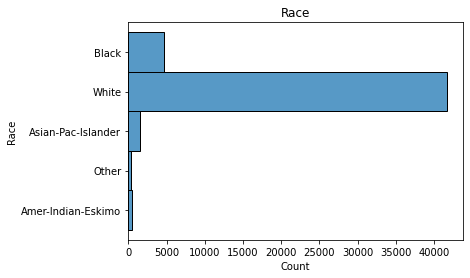

<Figure size 720x720 with 0 Axes>

In [241]:
# This dataset is dominated by White race with few minorities
sns.histplot(data=ml_df, y='race')
plt.title('Race')
plt.ylabel('Race')
plt.figure(figsize=(10,10))
plt.show();

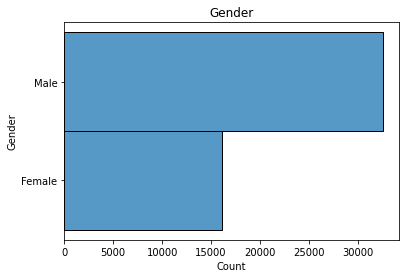

<Figure size 720x720 with 0 Axes>

In [242]:
# The dataset has more males than females
sns.histplot(data=ml_df, y='gender')
plt.title('Gender')
plt.ylabel('Gender')
plt.figure(figsize=(10,10))
plt.show();

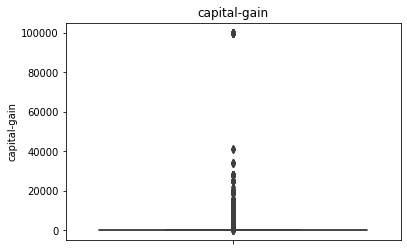

<Figure size 720x720 with 0 Axes>

In [243]:
# A lot of datapoints that have 0 capital gain and very few that have more than 0 capital gain

sns.boxplot(data=ml_df, y='capital-gain')
plt.title('capital-gain')
plt.ylabel('capital-gain')
plt.figure(figsize=(10,10))
plt.show();

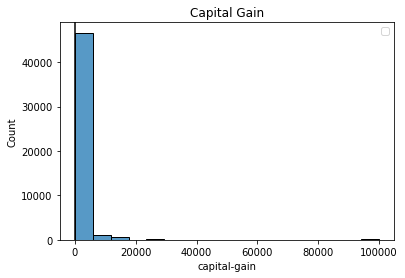

In [244]:
# A lot of datapoints that have 0 capital gain and very few that have more than 0 capital gain

ax = sns.histplot(data = ml_df, x = 'capital-gain');

ax.set(title= 'Capital Gain')
ax.axvline(ml_df['capital-gain'].median(),color = 'black')
ax.legend();

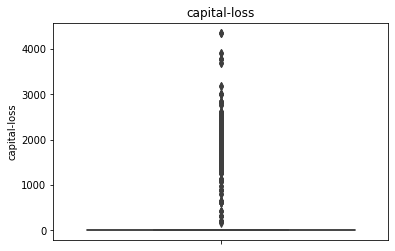

<Figure size 720x720 with 0 Axes>

In [245]:
# A lot of datapoints that have 0 capital loss and very few that have more than 0 capital loss

sns.boxplot(data=ml_df, y='capital-loss')
plt.title('capital-loss')
plt.ylabel('capital-loss')
plt.figure(figsize=(10,10))
plt.show();

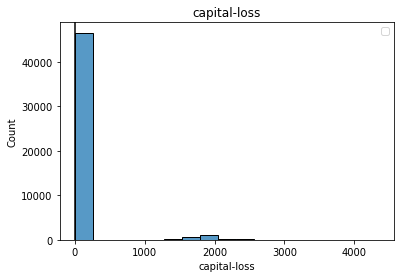

In [246]:
# A lot of datapoints that have 0 capital loss and very few that have more than 0 capital loss
ax = sns.histplot(data = ml_df, x = 'capital-loss');

ax.set(title= 'capital-loss')
ax.axvline(ml_df['capital-loss'].median(),color = 'black')
ax.legend();

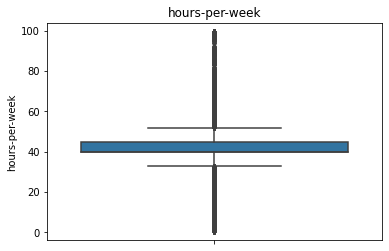

<Figure size 720x720 with 0 Axes>

In [247]:
# There are many outliers, but the average is still around 40 hours of week
sns.boxplot(data=ml_df, y='hours-per-week')
plt.title('hours-per-week')
plt.ylabel('hours-per-week')
plt.figure(figsize=(10,10))
plt.show();

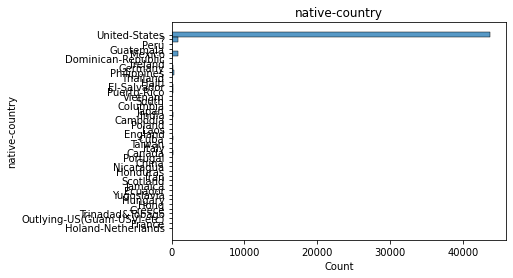

<Figure size 720x720 with 0 Axes>

In [248]:
# This plot/visual is not very helpful at all. There is very little data that is not related to the United States. 
sns.histplot(data=ml_df, y='native-country')
plt.title('native-country')
plt.ylabel('native-country')
plt.figure(figsize=(10,10))
plt.show();

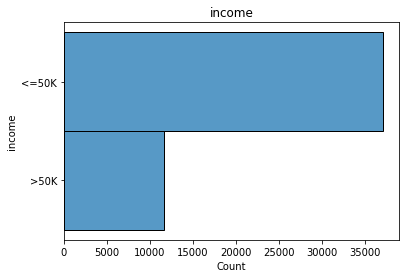

<Figure size 720x720 with 0 Axes>

In [249]:
# This dataset is a bit unbalanced wiht more people in this dataset that make less that 50k
sns.histplot(data=ml_df, y='income')
plt.title('income')
plt.ylabel('income')
plt.figure(figsize=(10,10))
plt.show();

# Correlations and Visualations

In [250]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [251]:
from dython.nominal import associations

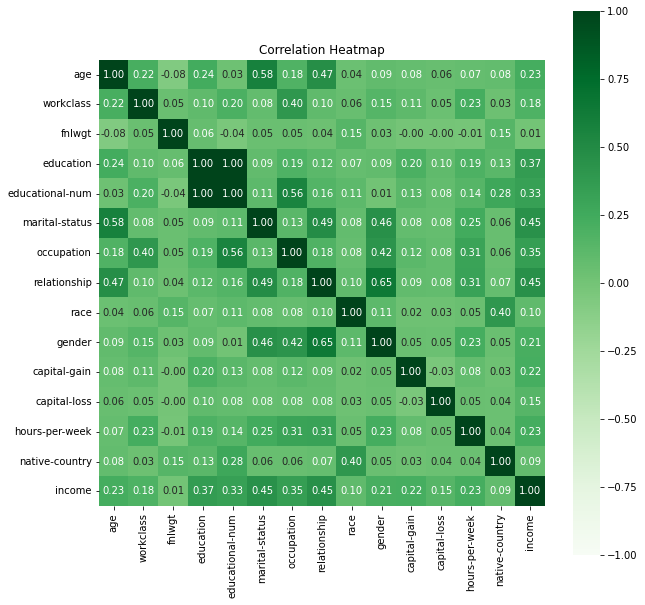

In [252]:
associations(ml_df, 
             figsize=(10,10), cmap = 'Greens', title = 'Correlation Heatmap');

- This heatmap of the features and the target (income). There is a strong correlation with occupation and the education-num. There is also a strong correlation between age and martial status. As I noted earlier, education and education-num are at 1 correlation as they are the same column just present differently. There are not too many negative correlations

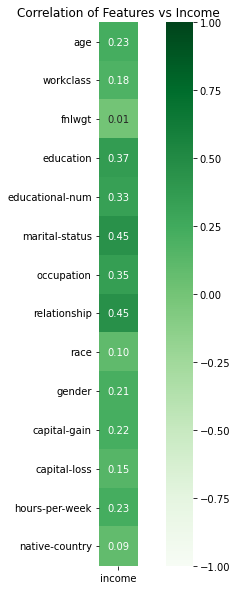

In [253]:
associations(ml_df, 
             figsize=(10,10), cmap = 'Greens', display_columns = 'income', hide_rows = 'income', title = 'Correlation of Features vs Income');

- Here is a heat map of the features with its correlation against the target, income. The highest correlation for the target is relationship, marital status, and education. Surpringsly, hours-per-week is not more correlated to work. 

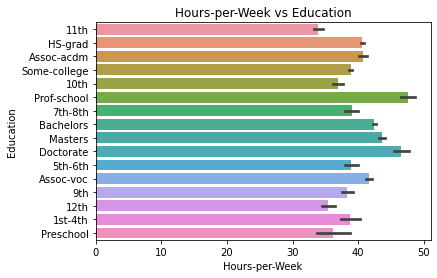

In [254]:
sns.barplot(data= ml_df, y='education', x='hours-per-week').set(title='Hours-per-Week vs Education')
plt.xlabel("Hours-per-Week")
plt.ylabel("Education");

- Here is a barplot with Education vs Hours-per-Week. It would make sense that the highest education of Prof-School and Doctorate works the longest hours. 

In [125]:
ml_df_1 = ml_df.copy()

In [257]:
#replace the target (income) with 0 for less than or equal to 50k and 1 for above 50k
ml_df_1['income'].replace({'<=50K': 0, '>50K':1}, inplace = True)
ml_df_1.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [258]:
ml_df_1

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [268]:
ml_df.groupby('gender')['income'].value_counts(normalize = True)

gender  income
Female  <=50K     0.890640
        >50K      0.109360
Male    <=50K     0.696081
        >50K      0.303919
Name: income, dtype: float64

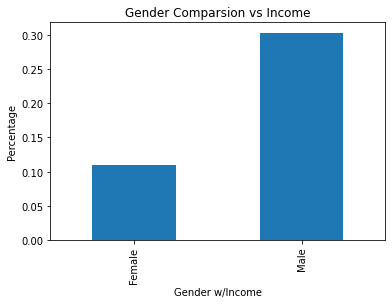

In [276]:
ml_df_1.groupby('gender')['income'].mean().plot(kind = 'bar')
plt.title("Gender Comparsion vs Income")
plt.xlabel("Gender w/Income")
plt.ylabel("Percentage")
plt.show();

- This graph shows that only around 11% of females make above 50k, while only about 30% of males make above 50k. 

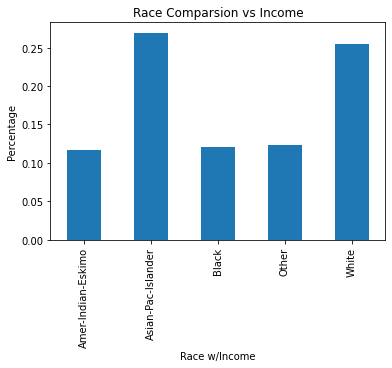

In [278]:
ml_df_1.groupby('race')['income'].mean().plot(kind = 'bar')
plt.title("Race Comparsion vs Income")
plt.xlabel("Race w/Income")
plt.ylabel("Percentage")
plt.show();

- This graph shows the Amer-Indian-Eskimo, Black, and Other community are around 11% make above 50k compared to the Asian-Pac-Islander and White commnuities where it is around 25% of the population make above 50k. 

In [130]:
gender_income = pd.DataFrame(ml_df[['gender', 'income']].value_counts(normalize = True)).reset_index()
gender_income

,gender,income,0
0,Male,<=50K,0.465300
1,Female,<=50K,0.295286
2,Male,>50K,0.203156
3,Female,>50K,0.036257


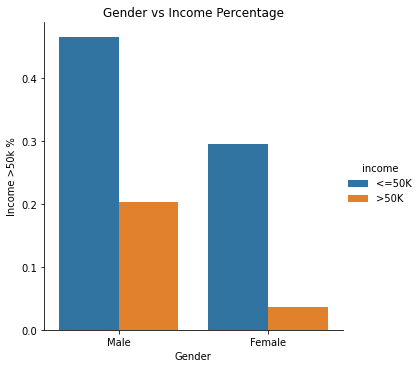

In [271]:
sns.catplot(data = gender_income, x = "gender", y= 0, hue = "income", kind = "bar").set(title = 'Gender vs Income Percentage')
plt.xlabel("Gender")
plt.ylabel("Income >50k %");

- Here shows a visual of the gender and income above or less than 50k in a form of a percentage. We can see that around 50% of the entire data set is male and make less or equal to than 50k.

# Preprocessing

In [134]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [135]:
ml_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [136]:
#replace the target (income) with 0 for less than or equal to 50k and 1 for above 50k
ml_df['income'].replace({'<=50K': 0, '>50K':1}, inplace = True)
ml_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [137]:
#Identify X and y. Drop fnlwgt and education when assigning X. fnlwgt does not show a pattern as noted above, and education is nominal with education-num
X = ml_df.drop(['fnlwgt', 'education', 'income'], axis = 1)
y = ml_df['income']

In [138]:
# Class Balance
ml_df['income'].value_counts(normalize = True)

0    0.760586
1    0.239414
Name: income, dtype: float64

In [139]:
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [140]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [141]:
# perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [142]:
len(X_train)

36592

In [143]:
len(y_train)

36592

In [144]:
len(X_test)

12198

In [145]:
len(y_test)

12198

In [146]:
cat_selector = make_column_selector(dtype_include = 'object')
num_cols = make_column_selector(dtype_include = 'number')
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = StandardScaler()

In [147]:
from sklearn import set_config
set_config(display='diagram')


In [148]:
num_tuple = (scaler, num_cols)
cat_tuple = (ohe, cat_selector)

In [149]:
preprocessor = make_column_transformer(num_tuple,cat_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426610>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426750>)])

# Modeling - Logistic Regression

In [150]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426610>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426750>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [151]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426610>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426750>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [152]:
logreg_pred_train = logreg_pipe.predict(X_train)
logreg_pred_test = logreg_pipe.predict(X_test)

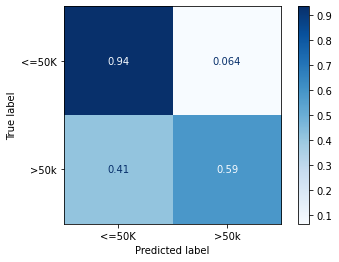

In [153]:
from sklearn.metrics import  ConfusionMatrixDisplay, \
 accuracy_score
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test, normalize = 'true', cmap = 'Blues', display_labels = labels)

In [154]:
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.8527547004809795
0.851860960813248


In [155]:
#create a list of c values and empty list for scores
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

In [156]:
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.7597966879816364,
 0.001: 0.8217740613215281,
 0.01: 0.8471060829644204,
 0.1: 0.852106902770946,
 1: 0.8514510575504181,
 10: 0.8516969995081161,
 100: 0.8516969995081161,
 1000: 0.8517789801606821}

- We will use C = .1 as it has the highest score

In [157]:
logreg_1000 = LogisticRegression(max_iter = 1000, C = 1000 )
logreg_pipe_1000 = make_pipeline(preprocessor, logreg_1000)
logreg_pipe_1000

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426610>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426750>)])),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000))])

In [158]:
logreg_pipe_1000.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426610>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff03d426750>)])),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000))])

In [159]:
logreg_pred_train_1000 = logreg_pipe_1000.predict(X_train)
logreg_pred_test_1000 = logreg_pipe_1000.predict(X_test)

In [160]:
print(logreg_pipe_1000.score(X_train, y_train))
print(logreg_pipe_1000.score(X_test, y_test))

0.8528640139921294
0.8517789801606821


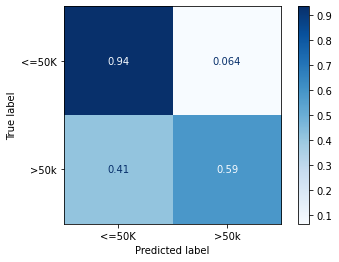

In [161]:
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, normalize = 'true', cmap = 'Blues', display_labels = labels);

In [162]:
train_probs = logreg_pipe_1000.predict_proba(X_train)
test_probs = logreg_pipe_1000.predict_proba(X_test)
train_probs[:5]

array([[0.97541233, 0.02458767],
       [0.27476842, 0.72523158],
       [0.56773152, 0.43226848],
       [0.9987131 , 0.0012869 ],
       [0.9796895 , 0.0203105 ]])

In [163]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
thresh = 0.2

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

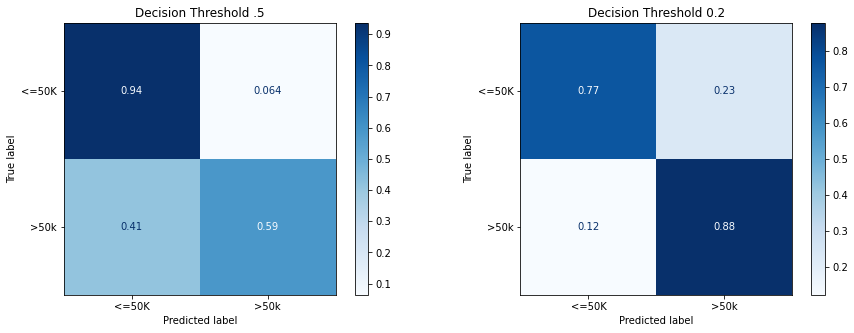

In [164]:
# plot confusion matrix for both .2 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh}');


- As we lowered our Threshold to .2, we've lowered our Type2 Error to .12. This is much lower than the original Type2 error of .41. Although, we had to make a greater Type1 error, depending on how the stakeholder wants, we can reduce Type2 error. 

Text(0, 0.5, 'Accuracy Score')

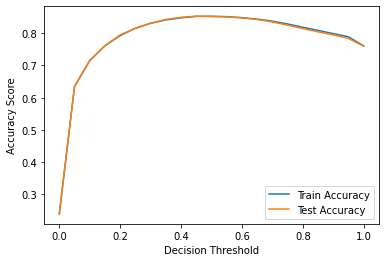

In [165]:
thresholds = np.array(range(0,105,5)) / 100

score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy'])

for thresh in thresholds:
  thresh = thresh 
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

score_df.plot()
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [166]:
score_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy
0.45,0.852563,0.852845
0.50,0.852864,0.851779
0.55,0.851662,0.850877
0.40,0.847972,0.849566
0.60,0.848519,0.847516
0.35,0.841331,0.843007
0.65,0.843928,0.842843
0.70,0.837615,0.835301
0.30,0.831083,0.830628
0.75,0.828788,0.825053


- The best accuracy for the threshold would be .45, but this would lead to a higher Type2 error than having a threshold of .2

In [167]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
thresh_45 = 0.45

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh_45 = [1 if x[1] > thresh_45 else 0 for x in train_probs]
test_thresh_45 = [1 if x[1] > thresh_45 else 0 for x in test_probs]

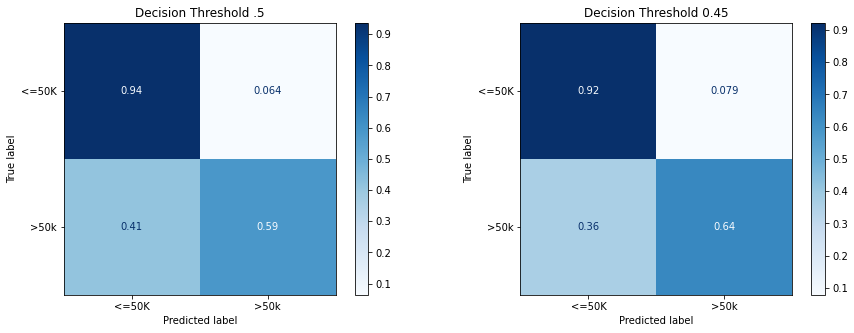

In [168]:
# plot confusion matrix for both .45 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh_45, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh_45}');


In [169]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_thresh_45))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      9268
           1       0.72      0.64      0.68      2930

    accuracy                           0.85     12198
   macro avg       0.80      0.78      0.79     12198
weighted avg       0.85      0.85      0.85     12198



In [84]:
logreg_pipe_1000.get_params()

NameError: ignored

# Modeling - KNN 

In [93]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [94]:
#make pipeline for KNN
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806890>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806990>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [95]:
#make predictions
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

In [96]:
#DEFAULT
acc_score_train = knn_pipe.score(X_train,y_train)
acc_score_test = knn_pipe.score(X_test, y_test)
print(acc_score_train)
print(acc_score_test)

0.8824333187581985
0.837596327266765


Tune the model

In [97]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806890>),
                                   ('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806990>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806890>),
                                 ('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                               

In [98]:
knn_params = {'kneighborsclassifier__n_neighbors':[3,5,10,15],
              'kneighborsclassifier__leaf_size':[20,25,30,35]}

In [99]:
from sklearn.model_selection import  GridSearchCV

knn_gs = GridSearchCV(knn_pipe,knn_params)
knn_gs

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806890>),
                                                                        ('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f8a68806990>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [20, 25, 30, 35],
                         'kneighborsclassifier__n_neighbors': [3, 5, 10, 15]})

In [100]:
knn_gs.fit(X_train,y_train)

KeyboardInterrupt: ignored

In [ ]:
knn_gs.best_params_

In [ ]:
knn_params_2 = {'kneighborsclassifier__n_neighbors':[15,18,20,22],
              'kneighborsclassifier__leaf_size':[10,15,18,20]}

In [ ]:
knn_gs_2 = GridSearchCV(knn_pipe,knn_params_2)
knn_gs_2

In [ ]:
%%time
knn_gs_2.fit(X_train,y_train)

In [ ]:
knn_gs_2.best_params_

In [ ]:
#Best params
acc_score_train = knn_gs_2.score(X_train,y_train)
acc_score_test = knn_gs_2.score(X_test, y_test)
print(acc_score_train)
print(acc_score_test)

In [ ]:
%%time
kn_best_pred_test = knn_gs_2.predict(X_test)

In [ ]:
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, kn_best_pred_test, normalize = 'true', cmap = 'Blues', display_labels = labels)

In [ ]:
knn_train_probs = knn_gs_2.predict_proba(X_train)
knn_test_probs = knn_gs_2.predict_proba(X_test)
knn_train_probs[:5]

In [ ]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
knn_thresh = 0.3

# use list comprehension to apply threshold to 2nd value in each prediction
knn_train_thresh = [1 if x[1] > knn_thresh else 0 for x in knn_train_probs]
knn_test_thresh = [1 if x[1] > knn_thresh else 0 for x in knn_test_probs]

In [ ]:
# plot confusion matrix for both .3 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, kn_best_pred_test, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_thresh, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {knn_thresh}');


In [ ]:
print(classification_report(y_test, kn_best_pred_test))

# PCA Test on dataset

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components= .95)
knn_2 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 20) #best params


In [ ]:
knn_pca_pipe = make_pipeline(preprocessor, pca, knn_2)
knn_pca_pipe

In [ ]:
%%time
knn_pca_pipe.fit(X_train, y_train)

In [ ]:
%%time
pca_predictions = knn_pca_pipe.predict(X_test)

In [ ]:
# calculate classification accuracy
pca_acc_score = knn_pca_pipe.score(X_test, y_test)
pca_acc_score



In [ ]:
evaluate_regression(y_test,  knn_pca_pipe.predict(X_test))

# Best Model

- The best model out of Logistic Regression and KNN is the Logistic Regression. The Logistic Regression had an accuracy of 85.28% with a decision threshold of .45. The Logisitc Regression had a low R^2 of 0.187855. Using .45 as the threshold, this model a Type2 Error of .36. I believe if we actually made the "Correct Class" being <= 50k, our model could possibly predict this class, as it predicted this group 92% of the time. 